# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### HSV spectrum

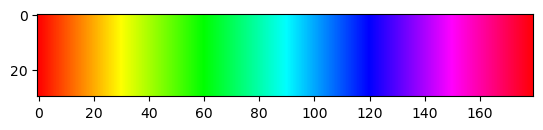

In [5]:
hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)
img = np.array([hue_spectrum]*30)
saturation_channel = np.ones_like(img, dtype='uint8')*255
value_channel = np.ones_like(img, dtype='uint8')*255

hsv = cv2.merge([img, saturation_channel, value_channel])
final_bgr_spectrum = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(final_bgr_spectrum[...,::-1])

### Find Hsv color from BGR

In [13]:
blue = np.array([[[255,0,0]]], 'uint8')

hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


### Tracking

In [15]:
cap = cv2.VideoCapture("videos/blue-track.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_blue = np.array([100,50,50])
    upper_blue = np.array([130,255,255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask = mask)
    cv2.imshow('image',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

### Tracking with contour

In [11]:
cap = cv2.VideoCapture("videos/blue-track.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_blue = np.array([100,50,50])
    upper_blue = np.array([130,255,255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    centers, radius = cv2.minEnclosingCircle(contours[0])
    centers = int(centers[0]), int(centers[1])
    radius = int(radius)
    cv2.circle(frame, centers, radius, (0,0,255), 2)
    cv2.imshow('image',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

### Read webcam

In [14]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_blue = np.array([100,50,50])
    upper_blue = np.array([130,255,255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()